In [1]:
import pandas as pd
sf = pd.read_csv('Combined_Cycle_Power_Plant.csv')
sf.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [2]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
Ambient_Temperature    9568 non-null float64
Exhaust_Vacuum         9568 non-null float64
Ambient_Pressure       9568 non-null float64
Relative_Humidity      9568 non-null float64
Electrical_Energy      9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
sf.describe()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


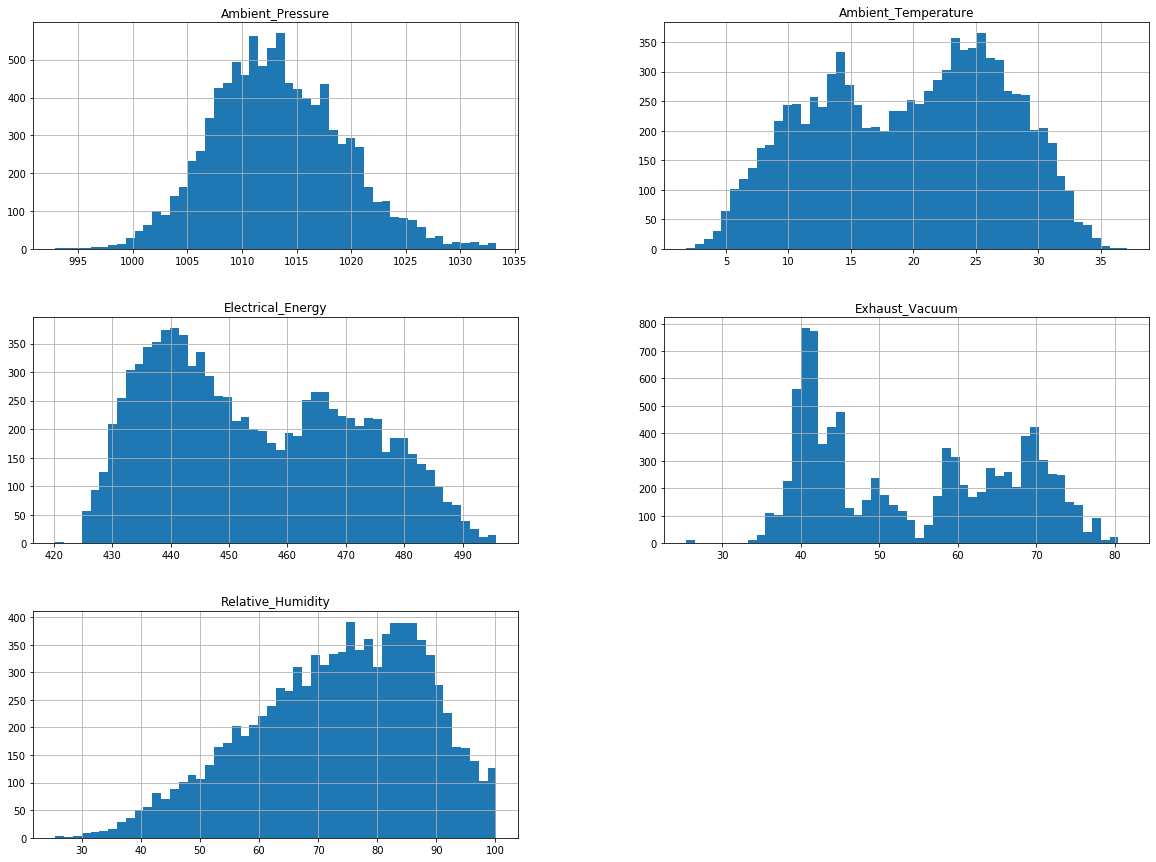

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Observations: 

1. These variables have very different scales. We will discuss this later in this chapter when we explore feature scaling.

2. Many histograms are right skewed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

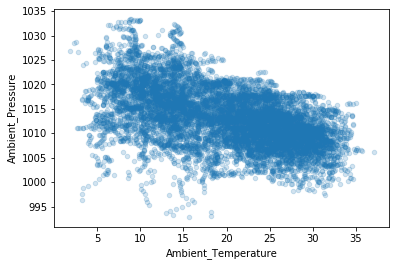

In [5]:
sf.plot(kind="scatter", x="Ambient_Temperature", y="Ambient_Pressure", alpha=0.2)
plt.savefig('map1.png')

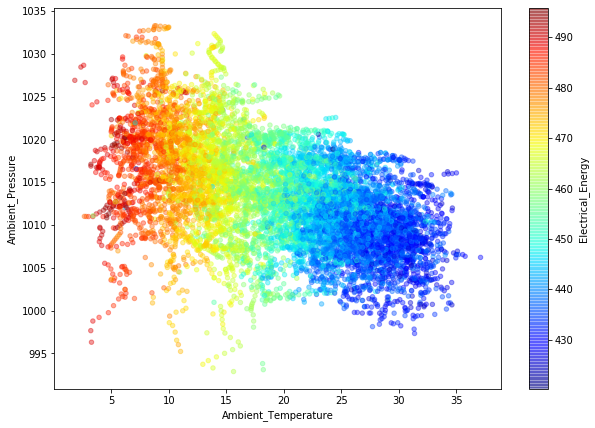

In [6]:
sf.plot(kind="scatter", x="Ambient_Temperature", y="Ambient_Pressure", alpha=0.4, figsize=(10,7),
    c="Electrical_Energy", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('map2.png')

Now let’s look at how much each independent variable correlates with the last sold price.

In [7]:
corr_matrix = sf.corr()
corr_matrix["Electrical_Energy"].sort_values(ascending=False)

Electrical_Energy      1.000000
Ambient_Pressure       0.518429
Relative_Humidity      0.389794
Exhaust_Vacuum        -0.869780
Ambient_Temperature   -0.948128
Name: Electrical_Energy, dtype: float64

The net hourly electrical energy tends to go up when the ambient temperature and exhaust vacuum go down. You can see a small positive correlation between the ambient pressure and the net hourly electrical energy. 

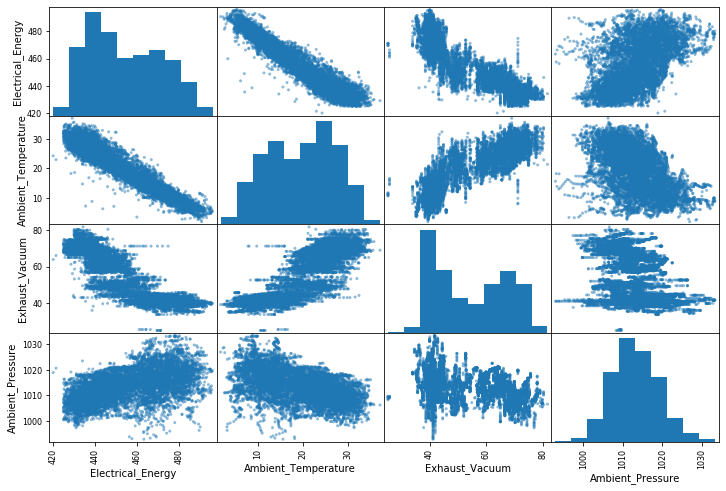

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["Electrical_Energy", "Ambient_Temperature", "Exhaust_Vacuum", "Ambient_Pressure"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable to predict the sold price is the zestimate, so let’s zoom in on their correlation scatterplot

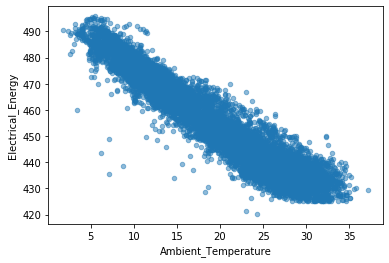

In [9]:
sf.plot(kind="scatter", x="Ambient_Temperature", y="Electrical_Energy", alpha=0.5)
plt.savefig('scatter.png')

First, the correlation is indeed very strong; you can clearly see the downward trend and the points are not too dispersed.

In [10]:
sf = sf[['Ambient_Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 
         'Relative_Humidity', 'Electrical_Energy']]
sf.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
X = sf[['Ambient_Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 
         'Relative_Humidity']]
Y = sf['Electrical_Energy']

In [12]:
X.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [13]:
X.shape

(9568, 4)

In [14]:
Y.shape

(9568,)

Standardization of the data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! We now have a working Linear Regression model.

In [18]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.9304


So, in our model, 93.04% of the variability in Y can be explained using X. It is so exciting.

Calculate root-mean-square error (RMSE)

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 4.5131


Our model was able to predict the net hourly electrical energy of every data point in the test set within 4.5131MW of the real net hourly electrical energy.

Calculate mean absolute error (MAE)

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 3.5983


let’s try a more complex model to see whether results can be improved - the RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [22]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9625


In [23]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 3.3122


Much better! Let's try one more.

In [24]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9502


In [26]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 3.8165


I would consider the RandomForestRegressor as our final model, let's print out feature importance

In [27]:
feature_labels = np.array(['Ambient_Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity'])
importance = forest_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Ambient_Temperature-90.80%
Exhaust_Vacuum-5.44%
Ambient_Pressure-1.94%
Relative_Humidity-1.81%
